In [29]:
# !pip install pandas
import pandas as pd
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [30]:
file_dir = "./simdata/"

if "simdata" in file_dir:
    from_line = 15
else:
    from_line = 20

file_list = []
for root, dirs, files in os.walk(file_dir):
    for fn in files:
        file_list.append(os.path.join(root, fn))

file_path = sorted(file_list, key=lambda x: int(os.path.basename(x).split(".")[0]))[-1]

# file_path = os.path.join(
#     file_dir,
#     fn
# )
with open(file_path) as f:
    data = f.read().splitlines()[from_line:]

data
fn

'1720977505.695453__3wrobotNI_N_CTRL_2024-07-14_19h18m25s__run01.csv'

In [31]:
headers = data[0].split(",")
data_dict = {}
for line in data[1:]:
    line_info = line.split(",")
    for idx, header in enumerate(headers):
        if header not in data_dict:
            data_dict[header] = [float(line_info[idx])]
        else:
            data_dict[header].append(float(line_info[idx]))

df = pd.DataFrame(data_dict)
# df
# data_dict

<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

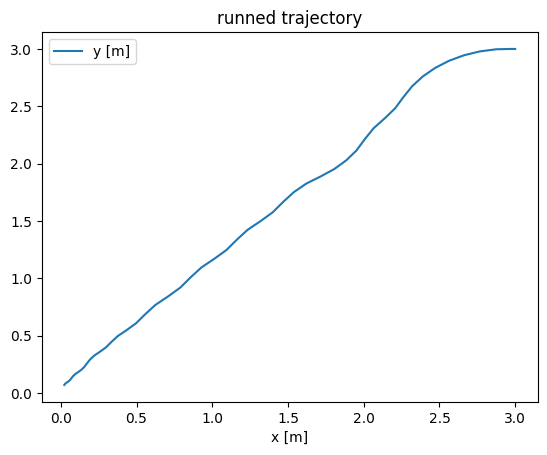

In [32]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()
df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

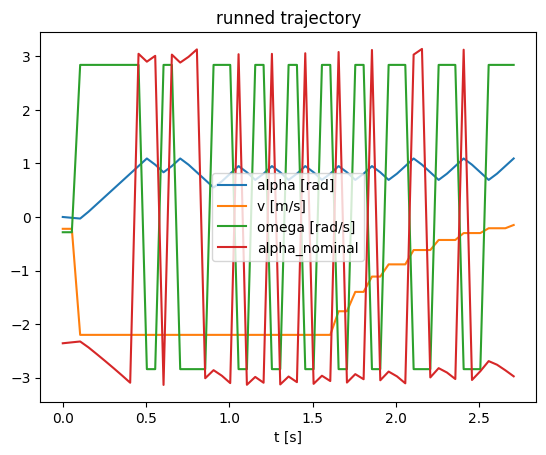

In [33]:
import numpy as np

df["alpha_nominal"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
df["alpha_nominal"] = df["alpha_nominal"].apply(lambda value: 2*np.pi - value if value > np.pi else value)
df["alpha_nominal"] = df["alpha_nominal"].apply(lambda value: 2*np.pi + value if value < -np.pi else value)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha_nominal"], title="runned trajectory")

In [34]:
k_a = 20
k_b = -0.05

df["beta"] = df.apply(lambda row:-row["alpha [rad]"] - row["alpha_nominal"], axis=1)
df["re-cal-omega"] = df["alpha_nominal"] * k_a + df["beta"] * k_b
print(df.to_markdown())

|    |      t [s] |     x [m] |     y [m] |   alpha [rad] |    run_obj |   accum_obj |   v [m/s] |   omega [rad/s] |   alpha_nominal |     beta |   re-cal-omega |
|---:|-----------:|----------:|----------:|--------------:|-----------:|------------:|----------:|----------------:|----------------:|---------:|---------------:|
|  1 | 0.0011     | 2.9998    | 3         |   0.000741885 | 1799.88    |     359.988 | -0.22     |          -0.284 |        -2.3569  |  2.35616 |       -47.2559 |
|  2 | 0.00604266 | 2.99871   | 3         |  -0.000661829 | 1799.23    |     539.911 | -0.22     |          -0.284 |        -2.35532 |  2.35598 |       -47.2242 |
|  3 | 0.0554692  | 2.98784   | 3.00008   |  -0.014699    | 1792.77    |     719.188 | -0.22     |          -0.284 |        -2.33945 |  2.35415 |       -46.9067 |
|  4 | 0.105469   | 2.97684   | 3.00032   |  -0.028899    | 1786.36    |     897.824 | -2.2      |           2.84  |        -2.32337 |  2.35227 |       -46.585  |
|  5 | 0.155469   | 2.

In [35]:
df
df.plot(x="t [s]", y=["stage_obj"], title="object")
df.plot(x="t [s]", y=["x [m]", "y [m]"], title="object")

KeyError: "None of [Index(['stage_obj'], dtype='object')] are in the [columns]"

In [40]:
np.arctan2(-1.995, -1.763), np.arctan2(1.995, 1.763)

(-2.294537774150904, 0.8470548794388896)

In [10]:
import numpy as np

initial_position = np.array(np.meshgrid([-3, 0, 3], [-3, 0, 3])).T.reshape(-1, 2) 

array([-3,  0,  3, -3,  0,  3, -3,  0,  3])

In [8]:
initial_position

array([[-3, -3],
       [-3,  0],
       [-3,  3],
       [ 0, -3],
       [ 0,  0],
       [ 0,  3],
       [ 3, -3],
       [ 3,  0],
       [ 3,  3]])